In [3]:
#OMP 

import create_data_upd as OD
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define dimensions
n_features = 4000   # Number of columns in A
cs_ratio=0.25
n_samples = cs_ratio*n_features  # Number of rows in A (measurements)
k_sparse = 5  #precentage
len_test = 1000
rows = 400
cols = 10
sig1vt_supp=10
zt_noise_sigma=0.01
data = OD.Data(rows=rows, cols=cols, sig1vt_supp=sig1vt_supp, k_sparse=k_sparse,zt_noise_sigma=zt_noise_sigma)
X_dataset_test, C_dataset_test, Z_dataset_test = data.create_Dataset(len_test)

# Create a random measurement matrix A
A = np.random.randn(int(n_samples), n_features)

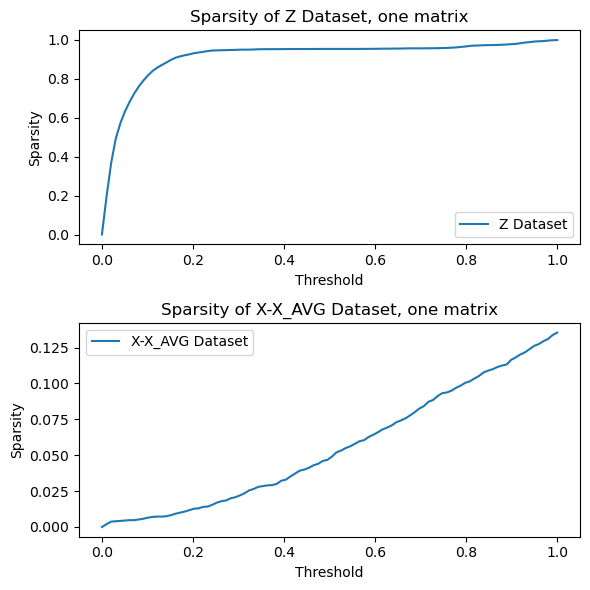

In [6]:
def calculate_sparsity(data, thresholds):
    sparsity_levels = []
    for threshold in thresholds:
        sparsity = np.sum(np.abs(data) < threshold) / 4000
        sparsity_levels.append(sparsity)
    return sparsity_levels


thresholds = np.linspace(0, 1, num=100)  # Adjust range and resolution of thresholds as needed

# Calculate sparsity for each dataset
Z_dataset_sparsity = calculate_sparsity(Z_dataset_test[0,:,:], thresholds)

X_AVG_dataset_sparsity = calculate_sparsity(X_dataset_test[0,:,:]-X_dataset_test[0,:,:].mean(axis=1,keepdims=True), thresholds)

# Setting up the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(6, 6))  # 2 rows, 1 columns

# Plot sparsity levels
axes[0].plot(thresholds, Z_dataset_sparsity, label='Z Dataset')
axes[0].set_title('Sparsity of Z Dataset, one matrix')
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('Sparsity')


axes[1].plot(thresholds, X_AVG_dataset_sparsity, label='X-X_AVG Dataset')
axes[1].set_title('Sparsity of X-X_AVG Dataset, one matrix')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('Sparsity')


# Adding legends
for ax in axes.flat:
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [4]:
#OMP for Z
z_true = Z_dataset_test[0,:,:].flatten()
mean_z=np.mean(z_true)
std_z=np.std(z_true)
z_true=(z_true-mean_z)/std_z

#OMP X-avg(X)
x_avg_true = X_dataset_test[0,:,:]-X_dataset_test[0,:,:].mean(axis=1,keepdims=True)
x_avg_true=x_avg_true.flatten()
mean_x_avg=np.mean(x_avg_true)
std_x_avg=np.std(x_avg_true)
x_avg_true=(x_avg_true-mean_x_avg)/std_x_avg


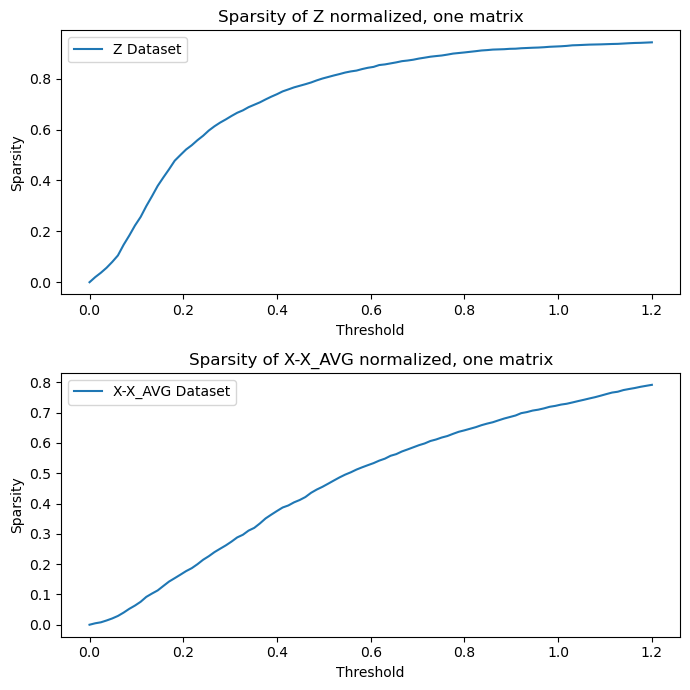

In [26]:
#Display sparse of normalized data
thresholds = np.linspace(0, 1.2, num=100)
# Calculate sparsity for each dataset
Z_dataset_sparsity = calculate_sparsity(z_true, thresholds)
X_AVG_dataset_sparsity = calculate_sparsity(x_avg_true, thresholds)
# Setting up the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(7, 7))  # 2 rows, 1 columns
# Plot sparsity levels
axes[0].plot(thresholds, Z_dataset_sparsity, label='Z Dataset')
axes[0].set_title('Sparsity of Z normalized, one matrix')
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('Sparsity')
axes[1].plot(thresholds, X_AVG_dataset_sparsity, label='X-X_AVG Dataset')
axes[1].set_title('Sparsity of X-X_AVG normalized, one matrix')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('Sparsity')

for ax in axes.flat:
    ax.legend()

plt.tight_layout()
plt.show()

In [9]:
#OMP Z - continued
# Generate measurements y
y_z = A @ z_true

n_nonzero_coefs=int(30/100*n_features)
# Initialize the OMP model
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
# Fit the model to find the sparse solution
omp.fit(A, y_z)

# Retrieve the recovered sparse signal
z_pred = omp.coef_
from sklearn.linear_model import orthogonal_mp
z_est = orthogonal_mp(A, y_z, n_nonzero_coefs=int(30/100*4000),tol=100)

/home-sipl/prj7482/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_omp.py:435: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(


Relative recovery error: 1.0971


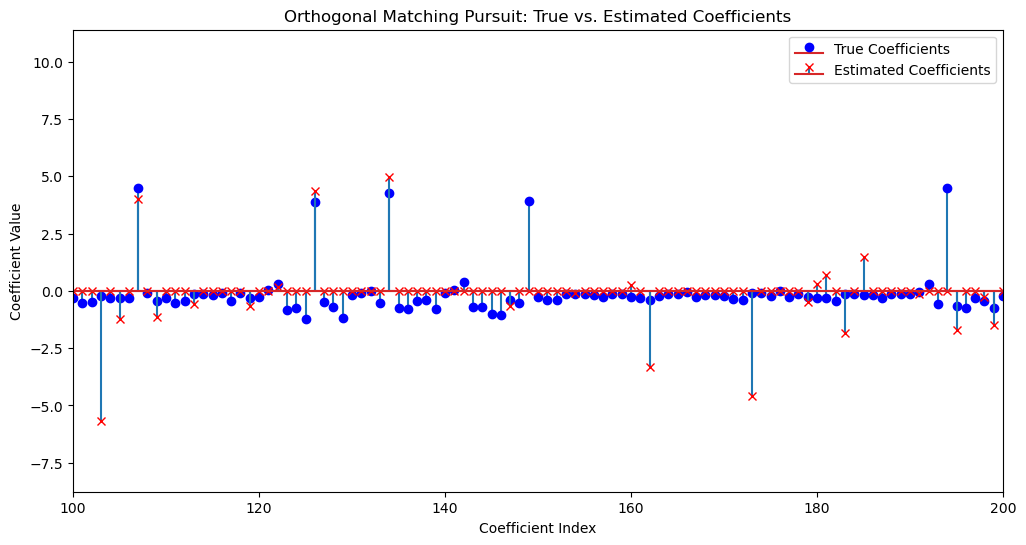

In [12]:
#other func
recovery_error = np.linalg.norm(z_true - z_est) / np.linalg.norm(z_true)
print("Relative recovery error: {:.4f}".format(recovery_error))

# Visualize the results
plt.figure(figsize=(12, 6))
plt.stem(z_true, markerfmt='bo', label='True Coefficients')
plt.stem(z_est, markerfmt='rx', label='Estimated Coefficients')
plt.xlim(100,200)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Orthogonal Matching Pursuit: True vs. Estimated Coefficients')
plt.legend()
plt.show()

In [14]:
#OMP X-avg(x) - continued
y_x_avg = A @ x_avg_true
#omp = OrthogonalMatchingPursuit(n_nonzero_coefs=int((60/100)*n_features)) #the same sparsity???

# Fit the model to find the sparse solution
#omp.fit(A, y_x_avg)

# Retrieve the recovered sparse signal
#x_avg_pred = omp.coef_
x_avg_est=orthogonal_mp(A, y_x_avg, n_nonzero_coefs=int(70/100*4000))

/home-sipl/prj7482/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_omp.py:435: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(


Relative recovery error: 1.4645


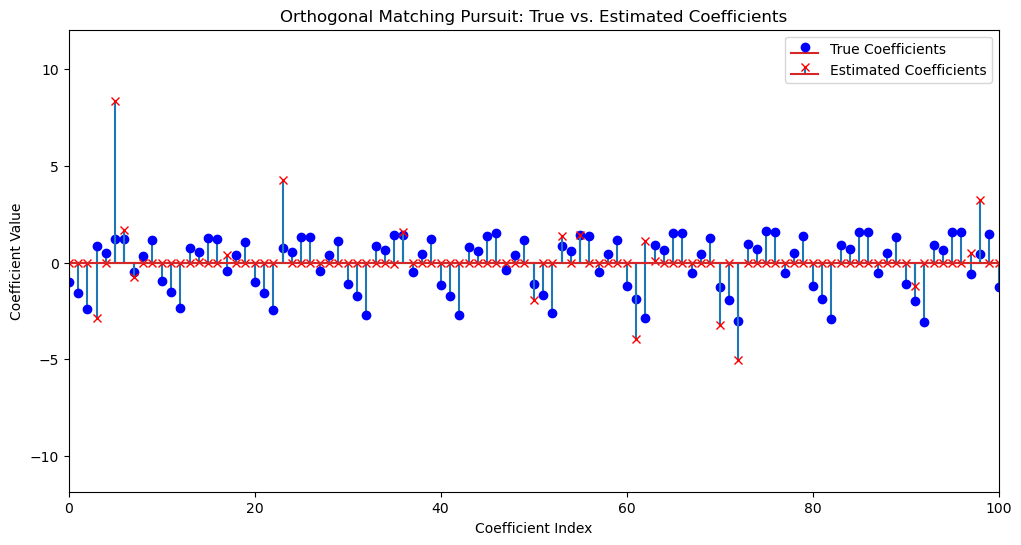

In [16]:
recovery_error = np.linalg.norm(x_avg_true - x_avg_est) / np.linalg.norm(x_avg_true)
print("Relative recovery error: {:.4f}".format(recovery_error))

# Visualize the results
plt.figure(figsize=(12, 6))
plt.stem(x_avg_true, markerfmt='bo', label='True Coefficients')
plt.stem(x_avg_est, markerfmt='rx', label='Estimated Coefficients')
plt.xlim(0,100)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Orthogonal Matching Pursuit: True vs. Estimated Coefficients')
plt.legend()
plt.show()
